In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd

from pprint import pprint

# Machine Learning - Models
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification

# Encoding Categorical Features and Labels

In [2]:
# Read the csv file into a pandas DataFrame
brain_df = pd.read_csv('resources/brain_categorical.csv')
brain_df.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
# Create input and output matrices
X = brain_df[["gender", "age", "size"]]
y = brain_df["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


## Encoding of Categorical Labels to Dummy/Indicator Variables (Pandas)
Encodes categorical columns of object or category type into a binary scheme

In [4]:
# Binary encode the categorical columns in the dataframe
# data_binary_encoded_df = pd.get_dummies(X, columns=["gender", "age"])
data_binary_encoded_df = pd.get_dummies(X)
data_binary_encoded_df.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


## Encoding of Categorical Labels to Categorical Binary
* Encodes categorical labels into binary scheme
* Useful for converting y labels into binary values

In [5]:
label_encoder = LabelBinarizer()

In [6]:
X_binary_enc = X.copy()
X_binary_enc['gender'] = label_encoder.fit_transform(X_binary_enc['gender'])
X_binary_enc['age'] = label_encoder.fit_transform(X_binary_enc['age'])
X_binary_enc.head()

,gender,age,size
0,1,0,4512
1,1,0,3738
2,1,0,4261
3,1,0,3777
4,1,0,4177


## Encoding of Categorical Labels to Categorical Integers
Encode categorical labels (objects or categories) as categorical integers

In [7]:
label_encoder = LabelEncoder()

In [8]:
X_int_enc = X.copy()
X_int_enc['gender'] = label_encoder.fit_transform(X_int_enc['gender'])
X_int_enc['age'] = label_encoder.fit_transform(X_int_enc['age'])
X_int_enc.head()

,gender,age,size
0,1,0,4512
1,1,0,3738
2,1,0,4261
3,1,0,3777
4,1,0,4177


## One-Hot Encoding of Categorical Integers
Encodes categorical integers into a one-hot (i.e., one-of-k) scheme

In [9]:
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_int_enc[['gender','age']])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [10]:
onehot_encoder.n_values_

array([2, 2])

In [11]:
onehot_encoder.feature_indices_

array([0, 2, 4], dtype=int32)

In [12]:
onehot_encoder.transform(X_int_enc[['gender','age']]).toarray()

array([[0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],


In [13]:
X_onehot_enc = pd.DataFrame( onehot_encoder.transform(X_int_enc[['gender','age']]).toarray() )
X_onehot_enc.head()

,0,1,2,3
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0


# Scaling and Normalization

## StandardScaler
Scales values to a standard normal distribution (gaussian distribution with mean $\mu$=0, standard deviation $\sigma$=1)

In [14]:
# Pre-process the input data to one-hot encode data that is categorically labeled
X = pd.get_dummies(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


In [16]:
# Scale the training data to standard normal distributions for each numerical feature and output
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Generate scaled training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


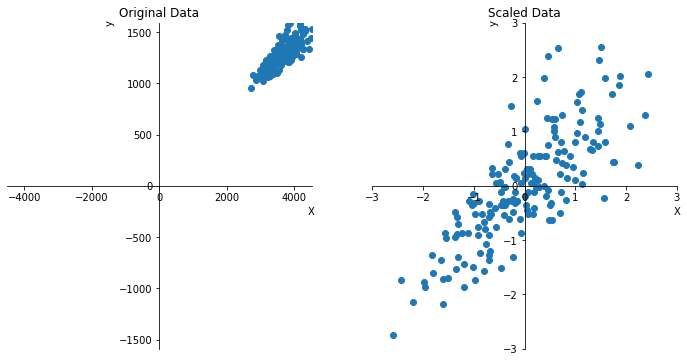

In [18]:
# Plot the original data and the scaled data
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-3, 3)
axes2.set_ylim(-3, 3)

def set_axes(ax):
    ax.set_xlabel('X', x=1.0)
    ax.set_ylabel('y', y=1.0)
    
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [19]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the performance of the model
print(f"Score - Test Data: {model.score(X_test_scaled, y_test_scaled)}")
print(f"Score - Training Data: {model.score(X_train_scaled, y_train_scaled)}")

Score - Test Data: 0.6804912531419804
Score - Training Data: 0.6427716264335066


In [20]:
# Calculate the Mean Squared Error
predictions_train = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)

print(f"Mean Squared Error - Test Data: {mean_squared_error(y_test_scaled, predictions_test)}")

Mean Squared Error - Test Data: 0.3230551580991294


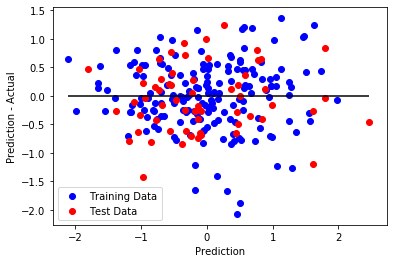

In [21]:
# Plot Residuals
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(predictions_train, predictions_train - y_train_scaled, c='b', label="Training Data")
ax.scatter(predictions_test, predictions_test - y_test_scaled, c='r', label="Test Data")

ax.hlines(y=0,
          xmin=min(predictions_train.min(), predictions_test.min()),
          xmax=max(predictions_train.max(), predictions_test.max()) )

ax.set_xlabel('Prediction')
ax.set_ylabel('Prediction - Actual')

plt.legend()

plt.show()

In [22]:
y_scaler.inverse_transform(predictions_test).shape

(60, 1)

### Comparison of StandardScaler Scaled/Normalized vs. Non-Scaled Model Performance

In [23]:
# Create and fit the model - Non-Scaled
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Evaluate the performance of the model
print(f"Score - Test Data: {model2.score(X_test, y_test)}")
print(f"Score - Training Data: {model2.score(X_train, y_train)}")

Score - Test Data: 0.680491253141963
Score - Training Data: 0.6427716264335066


In [24]:
# Calculate Mean Squared Error - Non-Scaled
predictions_train_non_scaled = model2.predict(X_train)
predictions_test_non_scaled = model2.predict(X_test)

print(f"Mean Squared Error - Test Data: {mean_squared_error(y_test, predictions_test_non_scaled)}")

Mean Squared Error - Test Data: 4645.296045679479


In this specific case, no difference in Linear Regression model performance when training the model using StandardScaler scaled vs. non-scaled data

## MixMaxScalar
Scales the data to a range specified by parameter feature_range or default range (0,1)

In [25]:
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


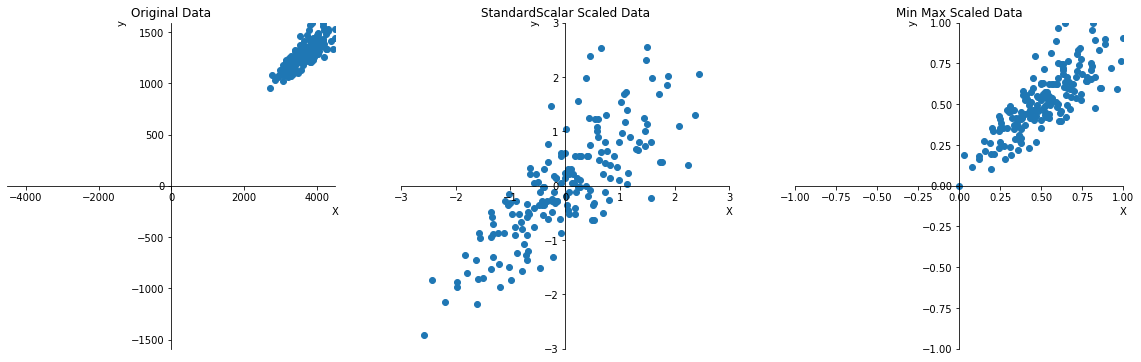

In [31]:
fig1 = plt.figure(figsize=(20, 6))
axes1 = fig1.add_subplot(1, 3, 1)
axes2 = fig1.add_subplot(1, 3, 2)
axes3 = fig1.add_subplot(1, 3, 3)

axes1.set_title("Original Data")
axes3.set_title("Min Max Scaled Data")
axes2.set_title("StandardScalar Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()

axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes3.set_xlim(-1, 1)
axes3.set_ylim(-1, 1)

axes2.set_xlim(-3, 3)
axes2.set_ylim(-3, 3)

def set_axes(ax):
    ax.set_xlabel('X', x=1.0)
    ax.set_ylabel('y', y=1.0)
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)
set_axes(axes3)

axes1.scatter(X_train["size"], y_train)
axes3.scatter(X_train_minmax[:,0], y_train_minmax[:])
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

plt.show()

### Comparison of MinMaxScalar vs. StandardScalar Model Performance

In [27]:
# Create and fit the model
model3 = LinearRegression()
model3.fit(X_train_minmax, y_train_minmax)

# Evaluate the performance of the model
print(f"Score - Test Data: {model3.score(X_test_minmax, y_test_minmax)}")
print(f"Score - Training Data: {model3.score(X_train_minmax, y_train_minmax)}")

Score - Test Data: 0.6804912531419808
Score - Training Data: 0.6427716264335066


In [28]:
# Create a residuals plot: Prediction vs. (Predictions - Actual)
predictions_train_minmax = model.predict(X_train_minmax)
predictions_test_minmax = model.predict(X_test_minmax)

print(f"Mean Square Error - Test Data: {mean_squared_error(y_test_minmax, predictions_test_minmax)}")

Mean Square Error - Test Data: 0.03459126287962508


In this specific case, no difference in Linear Regression model performance when training the model using MixMaxScalar vs. StandardScaler

## SUMMARY - Model Performance Non-Scaled, StandardScalar, MixMaxScalar

In [29]:
summary_df = pd.DataFrame([
        [ "Non-Scaled", 0.680491253141963, 0.6427716264335066, 4645.296045679479 ], 
        [ "StandardScalar", 0.6804912531419804, 0.6427716264335066, 0.3230551580991294 ], 
        [ "MixMaxScalar", 0.6804912531419808, 0.6427716264335066, 0.03459126287962508 ], 
    ], columns=["Scaling Type", "Score - Test Data", "Score - Training Data", "Mean Squared Error - Test Data"])
summary_df

,Scaling Type,Score - Test Data,Score - Training Data,Mean Squared Error - Test Data
0,Non-Scaled,0.680491,0.642772,4645.296046
1,StandardScalar,0.680491,0.642772,0.323055
2,MixMaxScalar,0.680491,0.642772,0.034591


In this specific case, no difference in Linear Regression model performance when training the model using Non-Scaled, StandardScaler, or MixMaxScalar approaches